In [114]:
import operator
from itertools import combinations
import time
import matplotlib.pyplot as plt

In [3]:
def Cpotentialof1generation(dataset):
    Cpotentialof1={}
    for line1 in dataset:
        for value in line1:
            if value in Cpotentialof1:
                Cpotentialof1[value] +=1
            else:
                Cpotentialof1[value] = 1

    Cpotentialof1=sorted(Cpotentialof1.items(),key=operator.itemgetter(1),reverse=True)
    Cpotentialof1=dict(Cpotentialof1)
    
    #convert all keys into tuple,save in new dic and then trasfering back
    Cpotentialof1_temp={}
    for itr5 in Cpotentialof1:
        tuple1=itr5,
        Cpotentialof1_temp[tuple1]=Cpotentialof1[itr5]
        
    Cpotentialof1=Cpotentialof1_temp
    
    for itr4 in Cpotentialof1:
        Cpotentialof1[itr4]/=len(dataset)
    return Cpotentialof1

In [63]:
def calculateHconf(Cpotential,Cpotentialof1,item):
    
    maxSuppOfAllSingleItem=0
    hconf=0
    for i in range(len(item)):
        for j in Cpotentialof1:
            #Since item[i] is a value of tuple and j is tuple itself, so need to convert so that tuple can match
            tuple1=item[i],
            if tuple1==j and Cpotentialof1[j]>maxSuppOfAllSingleItem:
                maxSuppOfAllSingleItem=Cpotentialof1[j]
    
    hconf=Cpotential[item]/maxSuppOfAllSingleItem
    #print("Hconf of",item,"is",hconf)
    return hconf

In [5]:
def prune(Cpotential,Cpotentialof1,MinSupp,MinHconf):
  
    C=dict()
    for itr1 in Cpotential:
        if Cpotential[itr1] >= MinSupp:
            hconf=calculateHconf(Cpotential,Cpotentialof1,itr1)
            #print("Hconf of item",itr1,"is ",hconf)
            if hconf>=MinHconf:
                #frequentitemset_supp.append(itr1)
                #tuple1=itr1,
                C[itr1]=Cpotential[itr1]
 
    #For making list externally sorted on support count for next level of pruning
    Cpotential=sorted(Cpotential.items(),key=operator.itemgetter(1),reverse=True)
    return C

In [33]:
def A_count(C_gen,dataset):
    C_potential_count=dict()
    C_ifexist=[]
    
    #Getting all the itemsets that exist in the dataset
    for line in dataset:
        for itr2 in C_gen:  
            if all(ele in line for ele in itr2): #Check if i_list is conatined in any of the line 
                if itr2 not in C_ifexist:
                    C_ifexist.append(itr2)      #If exist, append it to the list of existing itemset 
    #print(len(C_ifexist))
    #print(C_ifexist)
    
    #Count the occurance of those itemset which exist i.e support count and put them into dictionary to return
    for itr3 in C_ifexist:
        count=0
        for line3 in dataset:
            if all( x in line3 for x in itr3):    
                count+=1
        tuple1=tuple(itr3)
        C_potential_count[tuple1]=count
    #print(C_potential_count)
    
    for itr4 in C_potential_count:
        C_potential_count[itr4]/=len(dataset)
    
    return C_potential_count

In [7]:
#This function will return true if all k-1 subset of candiate_temp are frequent otherwise false

def checkFrquentSubset(C,candidate_temp):
    #print(candidate_temp)
    subset=[]
    subsetcount=0
    
    keys_list=list(C.keys())
     
    #Generate all possible subset of candidate_temp of size k-1 only
    subset=list(combinations(candidate_temp, len(candidate_temp)-1))
    subset=[list(elem) for elem in subset]                      #Convert list of tuples to list of lists
        
    #check if all subsets exist in frequent item set
    for eachsubset in subset:
        for key in keys_list:
            if eachsubset==list(key):
                subsetcount+=1
        
    #If all subset present in C(k-1) return true
    if subsetcount==len(subset):
        return True
                
    return False

In [8]:
def A_gen(C,k,MinSupp,MinHconf):
    C_gen=[]
    C_temp=[]
    C_len=len(C)
    
    items_list=list(C.items())
    #print(items_list)

    #f=first and s=second
    for i in range(len(items_list)-1):
        f=list(items_list[i][0])
        th=items_list[i][1]*MinHconf
        for j in items_list[i+1:]:
            s=list(list(j)[0])
            if j[1]>=th:
                if f[0:len(f)-1]==s[0:len(s)-1] and f[len(f)-1]!=s[len(s)-1]:
                    candidate_temp=f[0:len(f)-1]
                    candidate_temp.append(f[len(f)-1])
                    candidate_temp.append(s[len(s)-1])
                    
                    #For making list internally sorted on alphabetical order
                    candidate_temp=sorted(candidate_temp)
                    
                    #For frequent subset of k-1 based pruning
                    frequentSubset=checkFrquentSubset(C,candidate_temp)
                    if frequentSubset==True:
                        C_temp.append(candidate_temp)
    C_gen=C_temp      
    return C_gen

In [148]:
def hypercliquePatterns(MinSupp,MinHconf,start_lim,end_lim):
    dataset=[]
    Cpotentialof1={}
    Cof1={}
    C={}
    total_frequent_item_set=0
    k=1
    #MinSupp=0.05
    #MinHconf=0.2
    start_time=time.time()

    #print("Minimum Hconf =",MinHconf,"And Minimum support",MinSupp)


    #File open and putting into list of list called dataset
    file = open('kosarak.dat.txt','r')
    for line in file:
        dataset.append(line.split())

    #Printing the dataset
    N=len(dataset)
    #print("Length of data is =",N)
    #print("DATA is ")
    #for line in dataset:
        #print(line)
    #print()
    
    #Getting 1-itemset potential candidates in sorted disctionary
    #print("Itemset of 1 with their support count=")
    Cpotentialof1=Cpotentialof1generation(dataset[start_lim:end_lim])
    #print(Cpotentialof1)

    file.close()

    #Prune the items based on min support=2 and get a list of frequentitemsetof1
    Cof1=prune(Cpotentialof1,Cpotentialof1,MinSupp,MinHconf)
    #print("Frequent Item set of 1 =");print(Cof1)

    C=Cof1
    total_frequent_item_set+=len(Cof1)

    #for 2tok itemsets
    while True:
        k+=1
    
        #Next k itemset
        C_gen=[]
        C_gen=A_gen(C,k,MinSupp,MinHconf)
    
        #print()
        #print("Generated Itemset of",k,"=");print(C_gen)
    
        #When nothing generated, break loop
        if len(C_gen)<1:
            break
    
        #Checking itemset exist in dataset and counting their support
        C_potential_count=dict()
        C_potential_count=A_count(C_gen,dataset[start_lim:end_lim])
        #print("Itemset of",k,"with their support count =");print(C_potential_count)
    
    
        #getting freqent itemset of k itemset
        C=prune(C_potential_count,Cpotentialof1,MinSupp,MinHconf)
        #print("Frequent Item set of",k,"=");print(C)
    
        total_frequent_item_set+=len(C)

        if len(C)<=1:
            break
    
        #print("Total frquent item set =",total_frequent_item_set)
        #execution_time=print(time.time()-start_time,"seconds")
    
    exe_time=time.time()-start_time
    
    #print("Hyperclique patterns =",total_frequent_item_set,"Execution time =",exe_time)
    #print()
    return total_frequent_item_set,exe_time

In [168]:
MinSupplist=[0.02,0.06,0.08,0.1]
MinHconflist=[0.1,0.3,0.7,1]

startL=[0,15000]
endL=[25000,100000]


total_exe=[]
total_hp=[]


for limit in range(len(startL)):
    start_total=time.time()
    master_list_exe=[]
    master_list_hp=[]
    totalHp=0
    for h in MinHconflist:
        frequentItemlist=[]
        ExecutionTimelist=[]
        for s in MinSupplist:
            total_frequent_item_set1,exe_time1=hypercliquePatterns(s,h,startL[limit],endL[limit])
            totalHp+=total_frequent_item_set1
            frequentItemlist.append(total_frequent_item_set1)
            ExecutionTimelist.append(exe_time1)
    
        master_list_exe.append(ExecutionTimelist)
        master_list_hp.append(frequentItemlist)
    exe_total=time.time()-start_total
    total_exe.append(exe_total)
    total_hp.append(totalHp)

In [170]:
print("Support Threshold");print(MinSupplist)

print("H-confidance Threshold");print(MinHconflist)

print()
print("list of execution time by hconf and support combination");print(master_list_exe)
print()
print("list of #of hyperclique patterns by hconf and support combination");print(master_list_hp)

print()
print("Total time list");print(total_exe)

print()
print("Total hyperclique pattern for each limit");print(total_hp)

Support Threshold
[0.02, 0.06, 0.08, 0.1]
H-confidance Threshold
[0.1, 0.3, 0.7, 1]

list of execution time by hconf and support combination
[[59.06195068359375, 11.176703453063965, 5.637957334518433, 3.7106425762176514], [42.777939796447754, 6.880775690078735, 4.079745292663574, 3.2792856693267822], [20.255136251449585, 5.20821475982666, 2.6404004096984863, 2.696829319000244], [2.7515032291412354, 2.173035144805908, 2.4506804943084717, 1.9629857540130615]]

list of #of hyperclique patterns by hconf and support combination
[[50, 22, 14, 9], [32, 13, 9, 7], [27, 10, 6, 4], [27, 10, 6, 4]]

Total time list
[74.58595871925354, 180.92512440681458]

Total hyperclique pattern for each limit
[247, 250]


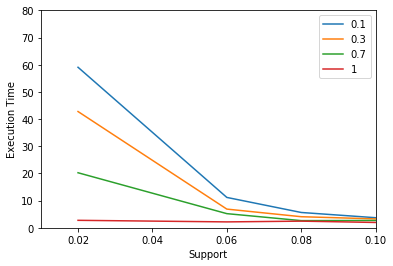

In [172]:
for m in range(len(MinHconflist)):
    plt.plot(MinSupplist,master_list_exe[m],label=MinHconflist[m])
    
     
plt.xlim(0.01,0.1)
plt.ylim(0,80)
# naming the x axis 
plt.xlabel('Support') 
# naming the y axis 
plt.ylabel('Execution Time') 
plt.legend()
# function to show the plot 
plt.show()


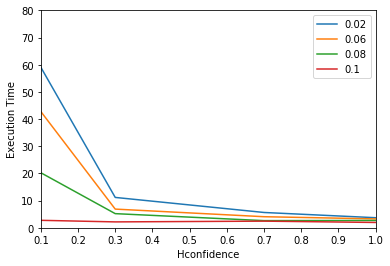

In [173]:

for m in range(len(MinSupplist)):
    plt.plot(MinHconflist,master_list_exe[m],label=MinSupplist[m])
    
     
plt.xlim(0.1,1)
plt.ylim(0,80)
# naming the x axis 
plt.xlabel('Hconfidence') 
# naming the y axis 
plt.ylabel('Execution Time') 
plt.legend()
# function to show the plot 
plt.show()


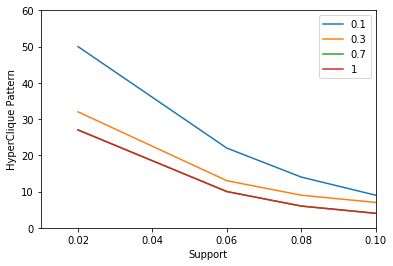

In [174]:
#plotGraph(MinHconflist,MinSupplist,master_list_hp)
for m in range(len(MinHconflist)):
    plt.plot(MinSupplist,master_list_hp[m],label=MinHconflist[m])
    
     
plt.xlim(0.01,0.1)
plt.ylim(0,60)
# naming the x axis 
plt.xlabel('Support') 
# naming the y axis 
plt.ylabel('HyperClique Pattern') 
plt.legend()
# function to show the plot 
plt.show()

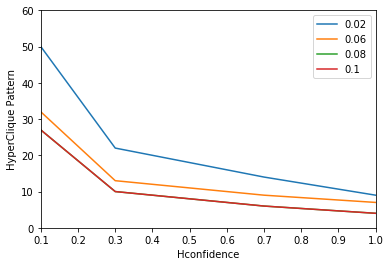

In [175]:
#plotGraph(MinSupplist,MinHconflist,master_list_hp)

for m in range(len(MinSupplist)):
    plt.plot(MinHconflist,master_list_hp[m],label=MinSupplist[m])
    
     
plt.xlim(0.1,1)
plt.ylim(0,60)
# naming the x axis 
plt.xlabel('Hconfidence') 
# naming the y axis 
plt.ylabel('HyperClique Pattern') 
plt.legend()
# function to show the plot 
plt.show()

No handles with labels found to put in legend.


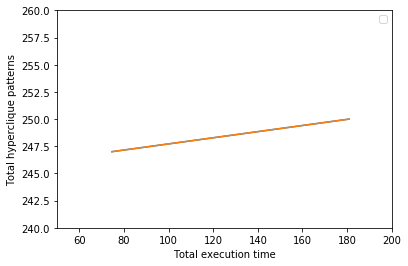

In [181]:
for limit in range(len(startL)):
    plt.plot(total_exe,total_hp)
plt.ylim(240,260)
plt.xlim(50,200)
# naming the x axis 
plt.xlabel('Total execution time') 
# naming the y axis 
plt.ylabel('Total hyperclique patterns') 
plt.legend()
# function to show the plot 
plt.show()